In [18]:
# Import libraries
import numpy as np
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from PIL import Image

### Data Preparation

In [19]:
# set directory for train and validate data
train_ds = 'data/glasses_dataset/train'
val_ds = 'data/glasses_dataset/validate'

In [20]:
# Rescalling the images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen
train_generator = train_datagen.flow_from_directory(
        train_ds,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=True)

# Flow test images in batches using train_datagen
val_generator = val_datagen.flow_from_directory(
        val_ds,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=True)

Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [21]:
train_generator.class_indices

{'glasses': 0, 'noglasses': 1}

## Building CNN Model

In [22]:
# Add custom layers
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [23]:
# Model compilation
cnn_model.compile(loss='binary_crossentropy',
              optimizer=SGD(learning_rate=0.002, momentum=0.8),
              metrics=['accuracy'])

In [24]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                11214912  
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

### Training the model

In [25]:
history = cnn_model.fit(
    train_generator,
   # steps_per_epoch=10,
    epochs=20,
    validation_data=val_generator,
   # validation_steps=20
)

Epoch 1/20
6/6 [==============================] - 1s 72ms/step - loss: 0.7498 - accuracy: 0.4423 - val_loss: 0.6468 - val_accuracy: 0.7000
Epoch 2/20
6/6 [==============================] - 0s 44ms/step - loss: 0.5910 - accuracy: 0.7404 - val_loss: 0.6002 - val_accuracy: 0.6500
Epoch 3/20
6/6 [==============================] - 0s 44ms/step - loss: 0.4936 - accuracy: 0.8365 - val_loss: 0.7646 - val_accuracy: 0.5000
Epoch 4/20
6/6 [==============================] - 0s 57ms/step - loss: 0.5388 - accuracy: 0.7019 - val_loss: 0.5372 - val_accuracy: 0.7750
Epoch 5/20
6/6 [==============================] - 0s 44ms/step - loss: 0.5393 - accuracy: 0.7115 - val_loss: 0.5098 - val_accuracy: 0.7750
Epoch 6/20
6/6 [==============================] - 0s 45ms/step - loss: 0.3841 - accuracy: 0.7692 - val_loss: 0.7214 - val_accuracy: 0.5500
Epoch 7/20
6/6 [==============================] - 0s 41ms/step - loss: 0.2992 - accuracy: 0.9231 - val_loss: 0.5477 - val_accuracy: 0.7000
Epoch 8/20
6/6 [===========

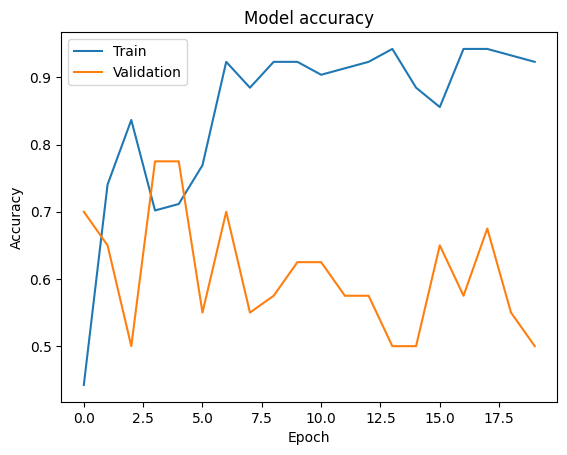

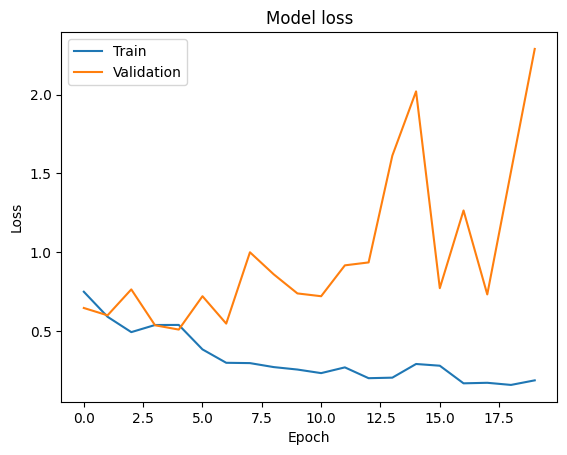

In [26]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Data Augmentation

In [27]:
# Data generator with augmentations for the training set
train_datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator for the test set (without augmentations)
val_datagen = ImageDataGenerator()

# Create augmented training and regular test generators
train_generator = train_datagen.flow_from_directory(
    train_ds,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True)

val_generator = val_datagen.flow_from_directory(
    val_ds,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True)

Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [28]:
history = cnn_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
6/6 [==============================] - 1s 151ms/step - loss: 98.8857 - accuracy: 0.4904 - val_loss: 0.7270 - val_accuracy: 0.4500
Epoch 2/20
6/6 [==============================] - 1s 132ms/step - loss: 0.7109 - accuracy: 0.4231 - val_loss: 0.7143 - val_accuracy: 0.3500
Epoch 3/20
6/6 [==============================] - 1s 120ms/step - loss: 0.7031 - accuracy: 0.4231 - val_loss: 0.7003 - val_accuracy: 0.3250
Epoch 4/20
6/6 [==============================] - 1s 119ms/step - loss: 0.6984 - accuracy: 0.4327 - val_loss: 0.6946 - val_accuracy: 0.4250
Epoch 5/20
6/6 [==============================] - 1s 135ms/step - loss: 0.6938 - accuracy: 0.4808 - val_loss: 0.6937 - val_accuracy: 0.4250
Epoch 6/20
6/6 [==============================] - 1s 125ms/step - loss: 0.6935 - accuracy: 0.4712 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 7/20
6/6 [==============================] - 1s 119ms/step - loss: 0.6933 - accuracy: 0.4712 - val_loss: 0.6931 - val_accuracy: 0.4500
Epoch 8/20
6/6 [===

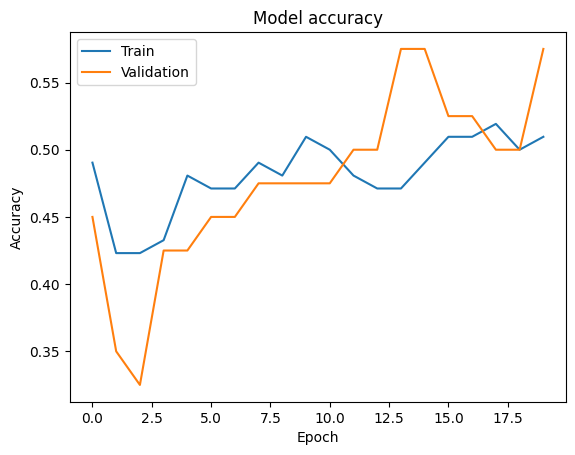

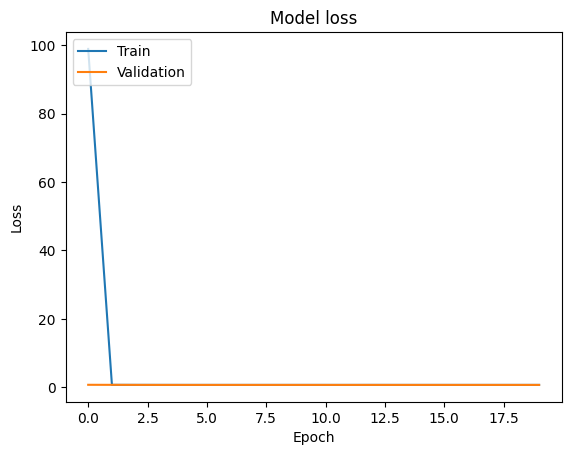

In [29]:
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Building ResNet Model

In [30]:
from keras.applications.resnet50 import ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [31]:
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  

model = Model(inputs=resnet_model.input, outputs=predictions)

In [32]:
# Freeze the layers of the pre-trained model
for layer in resnet_model.layers:
    layer.trainable = False

In [33]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [34]:
# Callbacks
checkpoint = ModelCheckpoint('wearing-glasses.h5', save_best_only=True)
early_stop = EarlyStopping(patience=5)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
6/6 [==============================] - 6s 378ms/step - loss: 3.8403 - accuracy: 0.4808 - val_loss: 2.1474 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 1s 149ms/step - loss: 2.2240 - accuracy: 0.5962 - val_loss: 0.3251 - val_accuracy: 0.8500
Epoch 3/20
6/6 [==============================] - 1s 122ms/step - loss: 0.6690 - accuracy: 0.7019 - val_loss: 0.2996 - val_accuracy: 0.8250
Epoch 4/20
6/6 [==============================] - 1s 132ms/step - loss: 0.3148 - accuracy: 0.8462 - val_loss: 0.6900 - val_accuracy: 0.6500
Epoch 5/20
6/6 [==============================] - 1s 128ms/step - loss: 0.2620 - accuracy: 0.8750 - val_loss: 0.2494 - val_accuracy: 0.8750
Epoch 6/20
6/6 [==============================] - 1s 128ms/step - loss: 0.2971 - accuracy: 0.8654 - val_loss: 0.2765 - val_accuracy: 0.8500
Epoch 7/20
6/6 [==============================] - 1s 128ms/step - loss: 0.1843 - accuracy: 0.9231 - val_loss: 0.3785 - val_accuracy: 0.7750
Epoch 8/20
6/6 [====

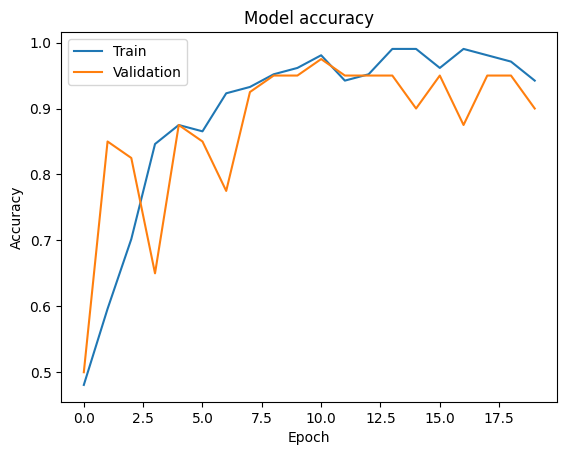

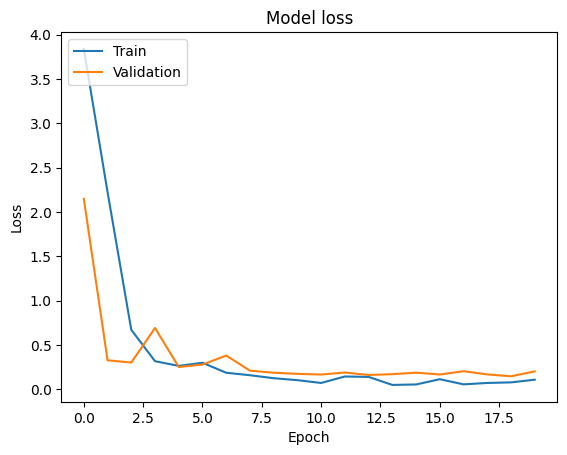

In [35]:
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Try some adjustes, for better performance

In [36]:
#from keras.applications.resnet50 import ResNet50, preprocess_input
#from keras.layers import GlobalAveragePooling2D, Dense, Dropout
#from keras.models import Model
#from keras.optimizers import Adam
#from keras.callbacks import ModelCheckpoint, EarlyStopping

In [37]:
# Preprocess input
#resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#x = resnet_model.output
#x = GlobalAveragePooling2D()(x)
#x = Dense(512, activation='relu')(x)
#x = Dropout(0.5)(x)
#predictions = Dense(1, activation='sigmoid')(x)  

#model = Model(inputs=resnet_model.input, outputs=predictions)

In [38]:
# Compile the model
#model.compile(optimizer=Adam(learning_rate=0.001),
#              loss='binary_crossentropy', 
#              metrics=['accuracy'])

In [39]:
# Callbacks
#checkpoint = ModelCheckpoint('wearing-glasses.h5', save_best_only=True)
#early_stop = EarlyStopping(patience=5)

#history = model.fit(
#    train_generator,
#    epochs=10,
#    validation_data=val_generator,
#    callbacks=[checkpoint, early_stop]
#)

In [40]:
# Accuracy plot
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

# Loss plot
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

### Predict

In [41]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [42]:
def preprocess_image(img_path, target_size=(224, 224)):
    """
    Preprocess the image: Load, resize, and preprocess for ResNet model.
    
    Parameters:
    img_path (str): Path to the image.
    target_size (tuple): The target size for resizing the image.

    Returns:
    numpy.ndarray: Preprocessed image ready for prediction.
    """
    # Load and resize the image
    img = image.load_img(img_path, target_size=target_size)

    # Convert the image to a numpy array and add a batch dimension
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Preprocess the image
    x = preprocess_input(x)

    return x

In [43]:
def predict_with_model(preprocessed_img, model):
    """
    Predict the class of the image using the provided model.
    
    Parameters:
    preprocessed_img (numpy.ndarray): The preprocessed image.
    model (keras.Model): The loaded Keras model for prediction.

    Returns:
    str: Prediction result - whether the person is wearing glasses or not.
    """
    # Predict the class
    predictions = model.predict(preprocessed_img)
    predicted_class = np.round(predictions[0]).astype(int)

    # Interpret the prediction
    if predicted_class == 0:
        return "The person is wearing glasses."
    else:
        return "The person is not wearing glasses."

In [44]:
image_one = preprocess_image('/kaggle/input/glasses-classification-dataset/test/row-7-column-6.jpg')

In [45]:
predict_with_model(image_one, model)

1/1 [==============================] - 1s 1s/step


'The person is not wearing glasses.'

In [46]:
image_two = preprocess_image('/kaggle/input/glasses-classification-dataset/test/row-7-column-8.jpg')

In [47]:
predict_with_model(image_two, model)

1/1 [==============================] - 0s 23ms/step


'The person is not wearing glasses.'

## Save the model

In [48]:
#model.save('wearing-glasses.h5')

In [49]:
!ls -lh

total 283M
-rw-r--r-- 1 root root 283M Dec 19 01:35 wearing-glasses.h5


## Save the model in tflite

In [50]:
import tensorflow as tf

# Load your Keras model
model = tf.keras.models.load_model('wearing-glasses.h5')

# Convert the model to the TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('wearing-glasses.tflite', 'wb') as f:
    f.write(tflite_model)

In [51]:
!ls -lh

total 377M
-rw-r--r-- 1 root root 283M Dec 19 01:35 wearing-glasses.h5
-rw-r--r-- 1 root root  94M Dec 19 01:47 wearing-glasses.tflite


In [52]:
# save the files
!zip -r file.zip /kaggle/working

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/wearing-glasses.h5 (deflated 8%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/wearing-glasses.tflite (deflated 7%)


In [53]:
# create a link to download
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip

### Test the TFLite model

In [54]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

In [60]:
# Function to load and preprocess the image
def load_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [61]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='/kaggle/working/wearing-glasses.tflite')
interpreter.allocate_tensors()

In [62]:
# Get input and output tensors information
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [63]:
# Load and preprocess an image
img_path = '/kaggle/input/glasses-classification-dataset/test/row-7-column-7.jpg' 
input_data = load_preprocess_image(img_path)

# Check if input type is quantized, then rescale input data to uint8
if input_details[0]['dtype'] == np.uint8:
    input_scale, input_zero_point = input_details[0]["quantization"]
    input_data = input_data / input_scale + input_zero_point

In [64]:
# Set the tensor to point to the input data to be inferred
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run the inference
interpreter.invoke()

# Retrieve the model's output and post-process it as necessary
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

predicted_class = (output_data > 0.5).astype(int)
if predicted_class[0][0] == 0:
    print("The person is wearing glasses.")
else:
    print("The person is not wearing glasses.")

[[1.]]
The person is not wearing glasses.


### Remove TF dependencies

In [65]:
#Install tflite_runtime and PIL
!pip install tflite_runtime pillow

  Obtaining dependency information for tflite_runtime from https://files.pythonhosted.org/packages/9e/1f/aade0d066bacbe697946ae21f0467a702d81adb939bb64515e9abebae9ed/tflite_runtime-2.14.0-cp310-cp310-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.2 MB/s eta 0:00:0000:0100:01


In [66]:
import numpy as np
from PIL import Image
from tflite_runtime.interpreter import Interpreter

In [67]:
# Function to load and preprocess the image
def load_preprocess_image(img_path, target_size=(224, 224)):
    img = Image.open(img_path).resize(target_size)
    img_array = np.array(img, dtype=np.float32)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image as per your model's requirement
    img_array /= 255.0
    return img_array

In [68]:
# Load the TensorFlow Lite model
interpreter = Interpreter(model_path='/kaggle/working/wearing-glasses.tflite')
interpreter.allocate_tensors()

# Get input and output tensors information
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [69]:
# Load and preprocess an image
img_path = '/kaggle/input/glasses-classification-dataset/test/row-1-column-9.jpg' 
input_data = load_preprocess_image(img_path)

In [70]:
# Check if input type is quantized, then rescale input data to uint8
if input_details[0]['dtype'] == np.uint8:
    input_scale, input_zero_point = input_details[0]["quantization"]
    input_data = input_data / input_scale + input_zero_point

In [71]:
# Set the tensor to point to the input data to be inferred
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run the inference
interpreter.invoke()

In [73]:
# Retrieve the model's output and post-process it as necessary
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)  # This will be the raw output of the model

# If the model outputs a binary class, use a threshold (e.g., 0.5) to convert it to a label
predicted_class = (output_data > 0.5).astype(int)
if predicted_class[0][0] == 0:
    print("The person is wearing glasses.")
else:
    print("The person is not wearing glasses.")

[[1.]]
The person is not wearing glasses.
